# Partie 1 :  Intro to text mining & Natural Language Processing

### 1 - Importe NLTK et télécharge les fonctions dont tu auras besoin (au fur et à mesure si nécessaire).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
import nltk
import string

In [2]:
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\cathe\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\cathe\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\cathe\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\cathe\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\cathe\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

True

### 2- Récupère le texte d'un article de presse de ton choix sur internet , affecte-le à une variable via un copier/coller dans ton notebook.

In [3]:
#Source = https://www.vogue.com/article/virgil-abloh-biography-career-timeline

vogue_extract = '''Abloh was born on September 30 outside of Chicago. He and his sister are raised in nearby Rockford, by Ghanaian immigrant parents. Abloh attends the Boylan Catholic High School—official colors green and white—and graduates in 1998. His mother is a seamstress and teaches him the tricks of her trade.
Abloh completes his undergraduate degree in civil engineering at the University of Wisconsin–Madison. (In 2015, he would return to design commemorative tees for the university.) Rumor has it that on the day of his graduation, he skips his final critique to take a meeting with Kanye West’s then-manager John Monopoly. West and Abloh begin officially working together soon after.
Abloh completes his master’s degree in architecture from the Illinois Institute of Technology. During his time at IIT, a Rem Koolhaas building is completed, which Abloh says, “piqued my interest and opened my gateway into fashion.'''


### 3 - Transforme ton texte en tokens de phrases

In [4]:
nltk.sent_tokenize(vogue_extract)

['Abloh was born on September 30 outside of Chicago.',
 'He and his sister are raised in nearby Rockford, by Ghanaian immigrant parents.',
 'Abloh attends the Boylan Catholic High School—official colors green and white—and graduates in 1998.',
 'His mother is a seamstress and teaches him the tricks of her trade.',
 'Abloh completes his undergraduate degree in civil engineering at the University of Wisconsin–Madison.',
 '(In 2015, he would return to design commemorative tees for the university.)',
 'Rumor has it that on the day of his graduation, he skips his final critique to take a meeting with Kanye West’s then-manager John Monopoly.',
 'West and Abloh begin officially working together soon after.',
 'Abloh completes his master’s degree in architecture from the Illinois Institute of Technology.',
 'During his time at IIT, a Rem Koolhaas building is completed, which Abloh says, “piqued my interest and opened my gateway into fashion.']

### 4 - Transforme ton texte en tokens de mots


In [5]:
liste_words = nltk.word_tokenize(vogue_extract)
liste_words


['Abloh',
 'was',
 'born',
 'on',
 'September',
 '30',
 'outside',
 'of',
 'Chicago',
 '.',
 'He',
 'and',
 'his',
 'sister',
 'are',
 'raised',
 'in',
 'nearby',
 'Rockford',
 ',',
 'by',
 'Ghanaian',
 'immigrant',
 'parents',
 '.',
 'Abloh',
 'attends',
 'the',
 'Boylan',
 'Catholic',
 'High',
 'School—official',
 'colors',
 'green',
 'and',
 'white—and',
 'graduates',
 'in',
 '1998',
 '.',
 'His',
 'mother',
 'is',
 'a',
 'seamstress',
 'and',
 'teaches',
 'him',
 'the',
 'tricks',
 'of',
 'her',
 'trade',
 '.',
 'Abloh',
 'completes',
 'his',
 'undergraduate',
 'degree',
 'in',
 'civil',
 'engineering',
 'at',
 'the',
 'University',
 'of',
 'Wisconsin–Madison',
 '.',
 '(',
 'In',
 '2015',
 ',',
 'he',
 'would',
 'return',
 'to',
 'design',
 'commemorative',
 'tees',
 'for',
 'the',
 'university',
 '.',
 ')',
 'Rumor',
 'has',
 'it',
 'that',
 'on',
 'the',
 'day',
 'of',
 'his',
 'graduation',
 ',',
 'he',
 'skips',
 'his',
 'final',
 'critique',
 'to',
 'take',
 'a',
 'meeting',
 

### 5 - Compte la fréquence d'apparition de chaque mot et réalise un graphique (si possible un diagramme en barre) qui représente les 20 mots les plus présents dans ton texte. Y a-t-il beaucoup de mots qui te semblent être des stopwords ?


In [6]:
dict_frequency = nltk.FreqDist(liste_words)
dict_frequency

FreqDist({'.': 10, 'Abloh': 6, 'his': 6, ',': 6, 'the': 6, 'of': 5, 'and': 5, 'in': 4, 'a': 3, 'on': 2, ...})

In [7]:
#transform count_words in df

df_count = pd.DataFrame.from_dict(dict_frequency, orient='index').reset_index()
df_count

,index,0
0,Abloh,6
1,was,1
2,born,1
3,on,2
4,September,1
...,...,...
109,interest,1
110,opened,1
111,gateway,1
112,into,1


In [8]:
# rename columns
df_count.rename({'index' : 'word', 0 : 'count'}, axis='columns', inplace=True)


In [9]:
df_graph = df_count.head(20)
df_graph

,word,count
0,Abloh,6
1,was,1
2,born,1
3,on,2
4,September,1
5,30,1
6,outside,1
7,of,5
8,Chicago,1
9,.,10


In [10]:
#graph


fig = px.pie(df_graph, values = "count", names = "word",
             title = 'Count of word appear in text',
             color_discrete_sequence=px.colors.sequential.RdBu)

fig.update_layout(title_x = 0.1,                    
                    width=800,
                    height=600,                    
                    template='plotly_dark',
                    font_size=13,
                    )
fig.show()

#### *Les plus récurrents sont en effet des stopwords*

### 6 - Enlève les stop words et la ponctuation, et regarde à nouveau quels sont les mots les plus présents. Là encore, réalise le même graphique pour comparer.

In [11]:
import re

#I take var name : 'vogue_extract' 

vogue_extract = vogue_extract.lower()

#on retire la ponctuation depuis le texte du départ 
delete_ponct = re.sub(r'[^\w\s]',"",vogue_extract)


#tokenize
sentence_token = nltk.word_tokenize(delete_ponct)
sentence_token

#on enève les stopwords
vogue_extract_without_SW = []

for words in sentence_token:
  if words not in nltk.corpus.stopwords.words("english"):
    if words !="," or words !=".":
      vogue_extract_without_SW.append(words)

vogue_extract_without_SW

['abloh',
 'born',
 'september',
 '30',
 'outside',
 'chicago',
 'sister',
 'raised',
 'nearby',
 'rockford',
 'ghanaian',
 'immigrant',
 'parents',
 'abloh',
 'attends',
 'boylan',
 'catholic',
 'high',
 'schoolofficial',
 'colors',
 'green',
 'whiteand',
 'graduates',
 '1998',
 'mother',
 'seamstress',
 'teaches',
 'tricks',
 'trade',
 'abloh',
 'completes',
 'undergraduate',
 'degree',
 'civil',
 'engineering',
 'university',
 'wisconsinmadison',
 '2015',
 'would',
 'return',
 'design',
 'commemorative',
 'tees',
 'university',
 'rumor',
 'day',
 'graduation',
 'skips',
 'final',
 'critique',
 'take',
 'meeting',
 'kanye',
 'wests',
 'thenmanager',
 'john',
 'monopoly',
 'west',
 'abloh',
 'begin',
 'officially',
 'working',
 'together',
 'soon',
 'abloh',
 'completes',
 'masters',
 'degree',
 'architecture',
 'illinois',
 'institute',
 'technology',
 'time',
 'iit',
 'rem',
 'koolhaas',
 'building',
 'completed',
 'abloh',
 'says',
 'piqued',
 'interest',
 'opened',
 'gateway',
 'f

In [12]:
#count 
dict_frequency2 = nltk.FreqDist(vogue_extract_without_SW)
dict_frequency2

FreqDist({'abloh': 6, 'completes': 2, 'degree': 2, 'university': 2, 'born': 1, 'september': 1, '30': 1, 'outside': 1, 'chicago': 1, 'sister': 1, ...})

In [13]:
#transform count_words in df
df_count2 = pd.DataFrame.from_dict(dict_frequency2, orient='index').reset_index()
df_count2

,index,0
0,abloh,6
1,born,1
2,september,1
3,30,1
4,outside,1
...,...,...
72,piqued,1
73,interest,1
74,opened,1
75,gateway,1


In [14]:
# rename columns
df_count2.rename({'index' : 'word', 0 : 'count'}, axis='columns', inplace=True)
df_count2

,word,count
0,abloh,6
1,born,1
2,september,1
3,30,1
4,outside,1
...,...,...
72,piqued,1
73,interest,1
74,opened,1
75,gateway,1


In [15]:
#graph
df_graph2 = df_count2.head(20)

fig = px.pie(df_graph2, values = "count", names = "word",
             title = 'Count of word appear in text - without stopwords',
             color_discrete_sequence=px.colors.sequential.RdBu)

fig.update_layout(title_x = 0.1,                    
                    width=800,
                    height=600,                    
                    template='plotly_dark',
                    font_size=13)
fig.show()

# Partie 2 : NLP 2 - Stemming & Lemmatizing

### 1- A partir de ton texte déjà nettoyé, donc en minuscule, sans stopwords ni ponctuation, utilise un stemmer pour rendre le corpus de mots encore plus pertinent 

In [16]:
from nltk.stem import SnowballStemmer

sentence_clean = delete_ponct

stem_en = SnowballStemmer("english")

for word in nltk.word_tokenize(sentence_clean):
  print(stem_en.stem(word))

abloh
was
born
on
septemb
30
outsid
of
chicago
he
and
his
sister
are
rais
in
nearbi
rockford
by
ghanaian
immigr
parent
abloh
attend
the
boylan
cathol
high
schooloffici
color
green
and
whiteand
graduat
in
1998
his
mother
is
a
seamstress
and
teach
him
the
trick
of
her
trade
abloh
complet
his
undergradu
degre
in
civil
engin
at
the
univers
of
wisconsinmadison
in
2015
he
would
return
to
design
commemor
tee
for
the
univers
rumor
has
it
that
on
the
day
of
his
graduat
he
skip
his
final
critiqu
to
take
a
meet
with
kany
west
thenmanag
john
monopoli
west
and
abloh
begin
offici
work
togeth
soon
after
abloh
complet
his
master
degre
in
architectur
from
the
illinoi
institut
of
technolog
dure
his
time
at
iit
a
rem
koolhaa
build
is
complet
which
abloh
say
piqu
my
interest
and
open
my
gateway
into
fashion


In [17]:
# comprehension list pour mettre les mots dans une liste

liste_mots_vogue = [stem_en.stem(word) for word in nltk.word_tokenize(delete_ponct)]
liste_mots_vogue

['abloh',
 'was',
 'born',
 'on',
 'septemb',
 '30',
 'outsid',
 'of',
 'chicago',
 'he',
 'and',
 'his',
 'sister',
 'are',
 'rais',
 'in',
 'nearbi',
 'rockford',
 'by',
 'ghanaian',
 'immigr',
 'parent',
 'abloh',
 'attend',
 'the',
 'boylan',
 'cathol',
 'high',
 'schooloffici',
 'color',
 'green',
 'and',
 'whiteand',
 'graduat',
 'in',
 '1998',
 'his',
 'mother',
 'is',
 'a',
 'seamstress',
 'and',
 'teach',
 'him',
 'the',
 'trick',
 'of',
 'her',
 'trade',
 'abloh',
 'complet',
 'his',
 'undergradu',
 'degre',
 'in',
 'civil',
 'engin',
 'at',
 'the',
 'univers',
 'of',
 'wisconsinmadison',
 'in',
 '2015',
 'he',
 'would',
 'return',
 'to',
 'design',
 'commemor',
 'tee',
 'for',
 'the',
 'univers',
 'rumor',
 'has',
 'it',
 'that',
 'on',
 'the',
 'day',
 'of',
 'his',
 'graduat',
 'he',
 'skip',
 'his',
 'final',
 'critiqu',
 'to',
 'take',
 'a',
 'meet',
 'with',
 'kany',
 'west',
 'thenmanag',
 'john',
 'monopoli',
 'west',
 'and',
 'abloh',
 'begin',
 'offici',
 'work',
 '

### 2- puis utilise FreqDist.

In [18]:
#count 
dict_frequency3 = nltk.FreqDist(liste_mots_vogue)
dict_frequency3


FreqDist({'his': 7, 'abloh': 6, 'the': 6, 'of': 5, 'and': 5, 'in': 5, 'he': 3, 'a': 3, 'complet': 3, 'on': 2, ...})

### 3 - Le stemmer a-t-il permis de faire remonter des informations pertinentes en regroupant certains mots de même racine ?

In [19]:
f"En effet il a permis de regrouper certains mots comme 'completes' & 'completed' entre autres"

"En effet il a permis de regrouper certains mots comme 'completes' & 'completed' entre autres"

### 4 - A partir de ton texte déjà nettoyé, donc en minuscule, sans stopwords ni ponctuation, utilise un lemmatizer pour rendre le corpus de mots encore plus pertinent

In [20]:
import spacy
# Import des règles anglaises
nlp = spacy.load('en_core_web_sm')

sentence_clean2 = delete_ponct


In [21]:
# spacy découpe automatiquement en tokens avec cette syntaxe :
sent_tokens = nlp(sentence_clean2)

liste_mots_vogue2 = []

for token in sent_tokens: 
     liste_mots_vogue2.append(token.lemma_)
     var = token, token.lemma_

len(liste_mots_vogue2)

146

### 5 - Puis utilise FreqDist

In [22]:
#count 
dict_frequency4 = nltk.FreqDist(liste_mots_vogue2)
dict_frequency4
len(dict_frequency4)

100

### 6 - Le lemmatizer a-t-il permis de faire remonter des informations pertinentes en regroupant certains mots de même racine ?

In [23]:
f"Cette fonction a permis de rgrouper des mots par leur racine, nous passons de 146 mots à 96"

'Cette fonction a permis de rgrouper des mots par leur racine, nous passons de 146 mots à 96'

# Partie 3 : NLP 3 - WordCloud

### 1 - Un WordCloud à partir du texte initial, grâce à la méthode generate_from_text


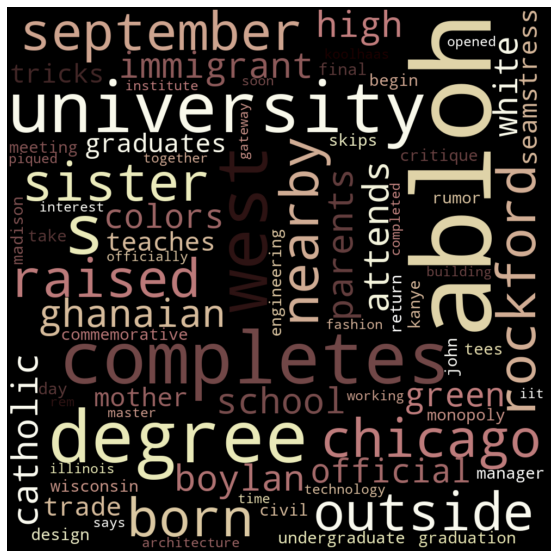

In [24]:
from wordcloud import WordCloud

# my text extract
initial_text = vogue_extract

#wordcloud layout
wordcloud = WordCloud(width=1000,
                      height=1000,
                      max_font_size=200,
                      min_font_size=12,
                      background_color="black",
                      colormap="pink")

# Génération du wordcloud 
wordcloud.generate_from_text(initial_text)

# Affichage grâce à Matplotlib
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


### 2 - Un WordCloud grâce à la méthode generate_from_frequencies après nettoyage des stopwords et de la ponctuation.


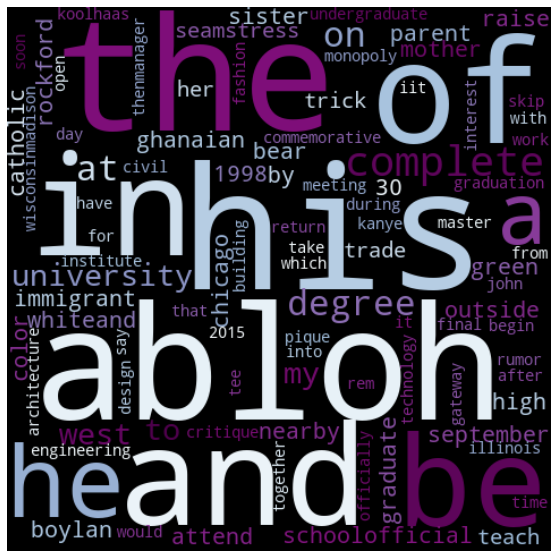

In [25]:
# text clean
sentence_clean3 = delete_ponct

sent_tokens = nlp(sentence_clean3)
dico = nltk.FreqDist([token.lemma_ for token in sent_tokens])


#wordcloud obejct
wordcloud = WordCloud(width=480, height=480, margin=0,
                      background_color="black",
                      max_font_size=150, min_font_size=12,
                      colormap="BuPu").generate_from_frequencies(dico)


# Affichage grâce à Matplotlib

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

### 3 - Un WordCloud grâce à la méthode generate_from_frequencies après nettoyage des stopwords et de la ponctuation, et application d'un stemmer.

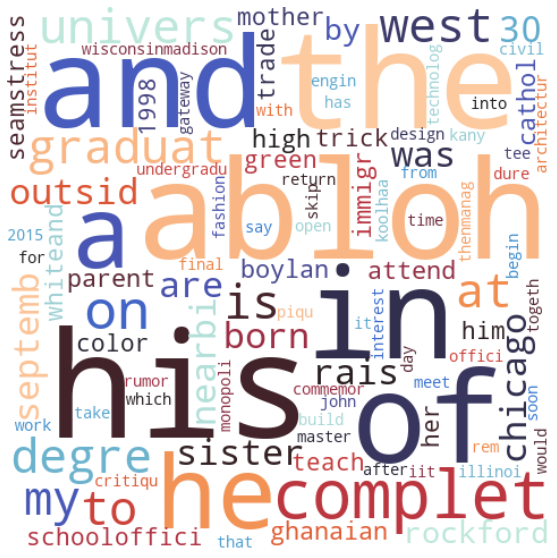

In [26]:
# text_after_stemmer
text_after_stemmer = dict_frequency3


#wordcloud obejct
wordcloud = WordCloud(width=480, height=480, margin=0,
                      background_color="white",
                      max_font_size=130, min_font_size=14,
                      colormap="icefire").generate_from_frequencies(text_after_stemmer)


# Affichage grâce à Matplotlib

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

### 4 - Un WordCloud grâce à la méthode generate_from_frequencies après nettoyage des stopwords et de la ponctuation, et application d'un lemmatizer.

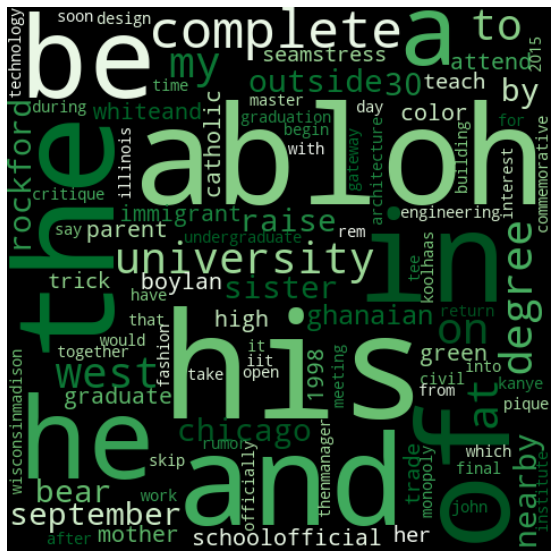

In [27]:
# text_after_stemmer
text_after_lemmatizer = dict_frequency4


#wordcloud obejct
wordcloud = WordCloud(width=480, height=480, margin=0,
                      background_color="black",
                      max_font_size=130, min_font_size=14,
                      colormap="Greens").generate_from_frequencies(text_after_lemmatizer)
# Affichage grâce à Matplotlib

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()